### Import Lib

In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal
from keras.preprocessing.image import load_img


**4.1 VGG16 MODEL PARAMETERS**

In [112]:
#Read image
img = cv2.imread('pic.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(224,224))


model.summary()
kernels,biases = model.layers[1].get_weights()
model.layers[1].get_config()

img = img_to_array(img)
img = expand_dims(img,axis=0)
img_ready = preprocess_input(img)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


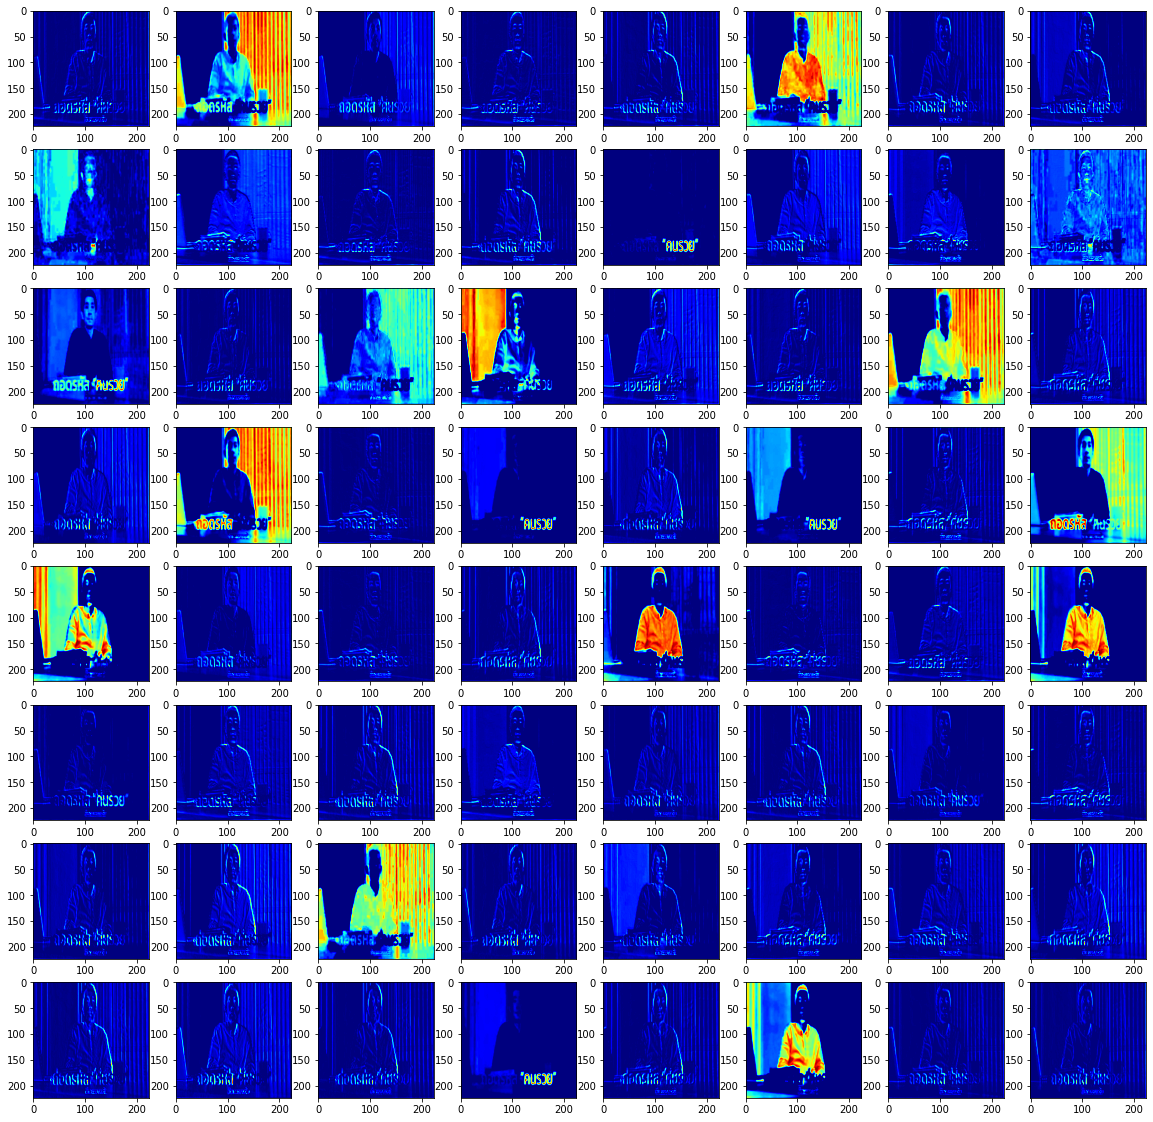

In [113]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

feature_maps = model.predict(img_ready)

f,ax = plt.subplots(nrows=8,ncols=8,figsize=(20,20))
square = 8
ix = 1
for ax in ax.flat:
		# ax.set_xticks([])
		# ax.set_yticks([])
	ax.imshow(feature_maps[0, :, :, ix-1], cmap='jet')
	ix += 1
plt.savefig('act4_1.png')
plt.show()

**4.2 IMAGE PREPARATION (From Scratch)**

(1, 224, 224, 3)


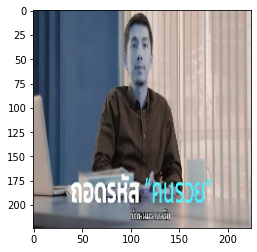

In [109]:
#Read Image
img = cv2.imread('pic.jpg')

img_res = cv2.resize(img,(224,224))

# img_mean = [123.68,116.779,103.939] R G B
img_mean = [103.939,116.779,123.68] # B G R

# print(img_reshape.shape)

# img.resize(224,224)
plt.imshow(img_res)
plt.show()

# bb_01 = img_res
# b_01 = bb_01[:, :, 0]
# b_01 -= img_mean[0]

# gg_01 = img_res
# g_01 = gg_01[:, :, 1]
# g_01 -= img_mean[1]

# rr_01 = img_res
# r_01 = rr_01[:, :, 2]
# r_01 -= img_mean[2] 
# img = tf.subtract(img, mean_img)



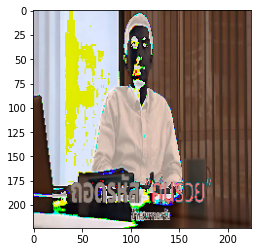

In [110]:
# for i in range(len(img_mean)):
#     img_reshape[0, :, :, i] = img_reshape[0, :, :, i].astype('float') - np.array([[img_mean[i]]*224]*224)
img_res = img_res.astype("float")
for w in range(0, 224):
    for h in range(0, 224):
        for c in range(0, 3):
            img_res[w][h][c] = img_res[w][h][c] - img_mean[c]
plt.imshow(img_res,cmap='jet')
plt.show()

img_reshape = np.array([img_res])

**4.3 CONV2D()**

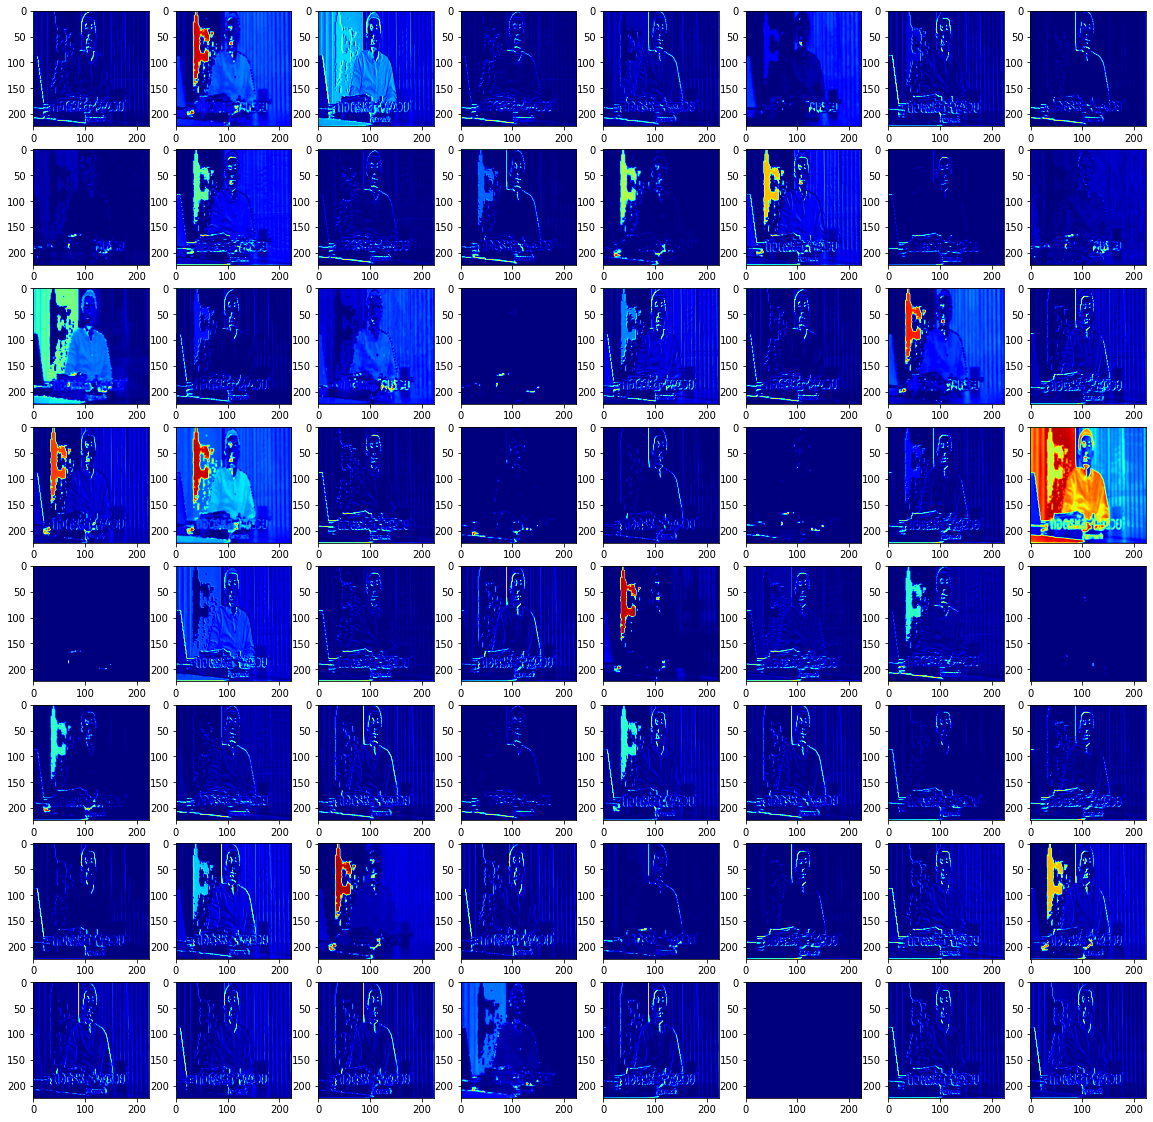

In [111]:
# Operate 2D convolution to image from 4.2(ImgBGR)
# Image convolution with kernel
img_result = np.zeros((224,224,3))
f, ax = plt.subplots(nrows=8, ncols=8, figsize=(20, 20))
ix = 1
for ax in ax.flat:
    img_result[:, :, 0] = signal.convolve2d(
        img_reshape[0, :, :, 0], kernels[:, :, 0, ix-1], mode='same', boundary='fill', fillvalue=0)
    img_result[:, :, 1] = signal.convolve2d(
        img_reshape[0, :, :, 1], kernels[:, :, 1, ix-1], mode='same', boundary='fill', fillvalue=0)
    img_result[:, :, 2] = signal.convolve2d(
        img_reshape[0, :, :, 2], kernels[:, :, 2, ix-1], mode='same', boundary='fill', fillvalue=0)

    img_sum = img_result[:, :, 0] + img_result[:, :, 1] + img_result[:, :, 2]
    img_sum = np.where(img_sum < 0, 0, img_sum)
    ax.imshow(img_sum, cmap="jet")
    ix += 1
plt.savefig('act4_3.png')
plt.show()
